In [1]:
import sys
sys.path.append('/home/sxr/code/xgcn')

In [2]:
from utils import io

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def get_ps(H):
    H1 = (H == 1) | (H == 0)
    H2 = (H == 2)
    H3 = (H == 3)
    H4 = (H == -1)
    num_case_study_nodes = len(H)
    p1 = []
    p2 = []
    p3 = []
    p4 = []
    topk_list = np.array(range(10, 101, 10))
    for topk in topk_list:
        num_totall = (num_case_study_nodes * topk)
        p1.append(H1[:,:topk].sum() / num_totall)
        p2.append(H2[:,:topk].sum() / num_totall)
        p3.append(H3[:,:topk].sum() / num_totall)
        p4.append(H4[:,:topk].sum() / num_totall)
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
    p4 = np.array(p4)
    return p1, p2, p3, p4

In [7]:
H_ppr = io.load_pickle('/home/sxr/data/social_and_user_item/model_outputs/gnn_pokec/ppr/top100-reco/top_reco_hops.pkl')
H_pprgo = io.load_pickle('/home/sxr/data/social_and_user_item/model_outputs/gnn_pokec/pprgo/[new_ppr][lr0.005][bpr][reg0]/top100-reco/top_reco_hops.pkl')

In [9]:
ps_ppr = get_ps(H_ppr)
ps_pprgo = get_ps(H_pprgo)

In [11]:
font_legend = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 16,
}
font_axis_label = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 20,
}

xtick = np.linspace(0, 2, 20)

def set_axis_font(ax):
    ax.tick_params(labelsize=16)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    for label in labels:
        label.set_fontname('Times New Roman')

def set_axis_number(ax, hop=2):
#     ax.xaxis.set_major_locator(plt.MultipleLocator(hop))
#     ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%1.1f'))
    pass

#####################

font_legend_down = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 16,
}
font_axis_label_down = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 20,
}

xtick = np.linspace(0, 2, 20)

def set_axis_font_down(ax):
    ax.tick_params(labelsize=16)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    for label in labels:
        label.set_fontname('Times New Roman')

def set_axis_number_down(ax, hop=2):
    ax.xaxis.set_major_locator(plt.MultipleLocator(hop))
    ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%1.1f'))

    
label_pb = 'PPRGo'
label_pa = 'PPRGo + SS'
label_lb = 'LightGCN'
label_la = 'LightGCN + SS'

style_dict_density = {
    'color':{
        label_lb:'g',
        label_la:'g',
        label_pb:'#CC5500',
        label_pa:'#CC5500',
    },
    'style':['--','-','--','-']
}
font_legend_density = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 11.5,
}
font_axis_label_density = {
    'family': 'Times New Roman',
    'weight': 'normal',
    'size': 20,
}

xtick = np.linspace(0, 2, 20)

def set_axis_font_density(ax):
    ax.tick_params(labelsize=16)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    for label in labels:
        label.set_fontname('Times New Roman')

def set_axis_number_density(ax, hop=2):
    ax.xaxis.set_major_locator(plt.MultipleLocator(hop))
#     ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%1.1f'))

color1 = '#D5E4A299'
color2 = '#D2AF8199'
color3 = '#709AE199'
color4 = '#FED43999'

color1 = '#29858E'
color2 = '#72CDB6'
color3 = '#C8FED3'
color4 = '#FEFEA0'

colors = [color1, color2, color3, color4]

In [12]:
def plot_bar(ax, ps, colors):
    p1, p2, p3, p4 = ps
    topk_list = (np.arange(10) + 1) * 10
    width=5
    ax.bar(topk_list, p1, width, color=colors[0], label='1-hop')
    ax.bar(topk_list, p2, width, color=colors[1], bottom=p1, label='2-hop')
    ax.bar(topk_list, p3, width, color=colors[2], bottom=p1+p2, label='3-hop')
    ax.bar(topk_list, p4, width, color=colors[3], bottom=p1+p2+p3, label='> 3-hop')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


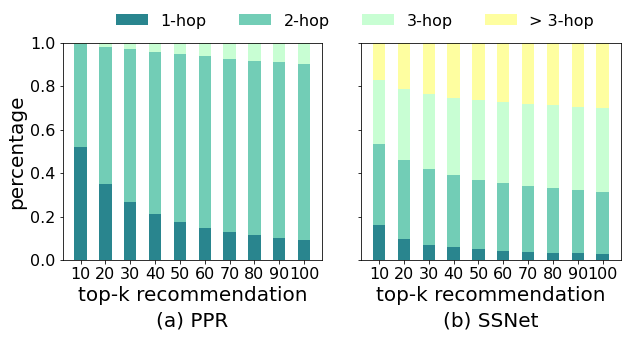

In [13]:
fig, axs = plt.subplots(1 , 2, figsize=(10, 4), sharey=True)

plt.subplots_adjust(
#     left=0.125,
#     bottom=0.1, 
#     right=0.9, 
#     top=0.9, 
    wspace=0.15,
#     hspace=0.35,
)

ax = axs[0]

plot_bar(ax, ps_ppr, colors)
# ax.legend(prop=font_legend, frameon=True, ncol=1)
ax.legend(prop=font_legend, frameon=False, ncol=4, bbox_to_anchor=(0.15, 1.0))
# ax.legend()
ax.set_ylim(0,1)
# ax0.set_xticklabels(name, rotation=90)
ax.set_ylabel('percentage', font_axis_label)
ax.set_xlabel('top-k recommendation', font_axis_label)
ax.set_title('(a) PPR', font_axis_label, y=-0.33)
set_axis_number(ax)
set_axis_font(ax)
set_axis_number_density(ax, hop=10)


ax = axs[1]

plot_bar(ax, ps_pprgo, colors)
# ax.legend(prop=font_legend, frameon=True, ncol=1)

ax.set_xlabel('top-k recommendation', font_axis_label)
ax.set_title('(b) SSNet', font_axis_label, y=-0.33)
set_axis_number_density(ax, hop=10)
set_axis_number(ax)
set_axis_font(ax)

# plt.title('livejournal-ppr-hops')
# plt.savefig('test2.pdf', dpi=300,  bbox_inches='tight')
plt.show()